In [114]:
import pandas as pd
import numpy as np
from alphien.utils import get_all_data, _read_output

In [115]:
def add_features(data):
    data = data.copy()
    data['date'] = pd.to_datetime(data['date'])
    data = data.set_index('date')
    data['adjClose'] = pd.to_numeric(data['adjClose'],errors='coerce')
    data['Forward Return Daily'] = data['adjClose'].shift(-1)/data['adjClose']
    data['Forward Return Quarterly'] = data['adjClose'].shift(-63)/data['adjClose']
    data = data.dropna()
    return data

In [116]:
datalist = list(_read_output().values())
datalist = [data for data in datalist if data.shape[0] > 1]
datalist = [add_features(data) for data in datalist]

In [117]:
df = pd.concat(datalist)
df = df.reset_index()
df = df.sort_values(by=['date','ticker'])
df = df.set_index(['date','ticker'])

In [118]:
"""Get labels"""
labels = df.groupby(['date'])['Forward Return Quarterly'].nlargest(50)
labels = labels.droplevel(0).reset_index()
labels = labels.drop('Forward Return Quarterly', axis = 1)
# labels.to_csv('labels.csv')

In [120]:
"""Get fixed inclusion"""
all_tickers = list(df.reset_index()['ticker'].unique())

inclusion = pd.read_csv('inclusion.csv', index_col=0)
inclusion = inclusion[all_tickers]
inclusion.index = pd.to_datetime(inclusion.index)
inclusion.index.name = 'date'
inclusion = inclusion.resample('D').ffill()
inclusion.index = inclusion.index.tz_localize(None)


trading_days = df.index.levels[0]
temp = pd.DataFrame(index=trading_days)
temp.index = temp.index.tz_localize(None)


fixed_inclusion = pd.merge(temp, inclusion, how='left', left_index=True, right_index=True)
fixed_inclusion = fixed_inclusion['2000-03-31':'2020-06-30']
fixed_inclusion.to_csv('fixed_inclusion.csv')

In [119]:
fixed_incl = pd.read_csv('fixed_inclusion.csv', index_col=0)
# fixed_incl.sum(axis=1).plot()
fixed_incl.index = pd.to_datetime(fixed_incl.index)
fixed_incl.index = fixed_incl.index.tz_localize('UTC')
to_map = fixed_incl.stack()
to_map.name = 'isValid'
to_map.index.names = ['date','ticker']

FileNotFoundError: [Errno 2] No such file or directory: 'fixed_inclusion.csv'

In [67]:
dfs = pd.merge(df, to_map, left_index=True, right_index=True, how='left')
dfs = dfs.dropna()

In [112]:
dfs

close    high     low    open   volume  \
date                      ticker                                            
2000-03-31 00:00:00+00:00 A       104.00  106.00   90.00  106.00  2670200   
                          AAPL    135.81  137.25  126.00  127.44  3612800   
                          ABC      15.00   15.62   14.44   14.50   445100   
                          ABMD     40.50   40.88   36.88   40.25    87600   
                          ABT      35.19   35.94   34.44   35.50  7390100   
...                                  ...     ...     ...     ...      ...   
2020-06-30 00:00:00+00:00 YUM      86.91   87.41   85.54   85.91  2046600   
                          ZBH     119.36  120.78  115.97  116.70  1917634   
                          ZBRA    255.95  258.06  251.65  252.75   344500   
                          ZION     34.00   34.25   32.81   33.01  1592200   
                          ZTS     137.04  137.82  132.06  132.10  1878800   

                                    adjClose     adjHigh      adjLow  \
date                      ticker                                       
2000-03-31 00:00:00+00:00 A        69.013038   70.340212   59.722822   
                          AAPL      1.047717    1.058826    0.972037   
                          ABC       2.984646    3.108011    2.873219   
                          ABMD     20.250000   20.440000   18.440000   
                          ABT       9.218251    9.414719    9.021784   
...                                      ...         ...         ...   
2020-06-30 00:00:00+00:00 YUM      86.488673   86.986249   85.125314   
                          ZBH     119.145645  120.563095  115.761733   
                          ZBRA    255.950000  258.060000  251.650000   
                          ZION     33.669997   33.917571   32.491547   
                          ZTS     136.848523  137.627433  131.875481   

                                     adjOpen  adjVolume  divCash  splitFactor  \
date                      ticker                                                
2000-03-31 00:00:00+00:00 A        70.340212    3699966      0.0          1.0   
                          AAPL      0.983146  404634004      0.0          1.0   
                          ABC       2.885158    1780400      0.0          1.0   
                          ABMD     20.125000     175200      0.0          1.0   
                          ABT       9.299458    7898800      0.0          1.0   
...                                      ...        ...      ...          ...   
2020-06-30 00:00:00+00:00 YUM      85.493520    2046600      0.0          1.0   
                          ZBH     116.490422    1917634      0.0          1.0   
                          ZBRA    252.750000     344500      0.0          1.0   
                          ZION     32.689606    1592200      0.0          1.0   
                          ZTS     131.915425    1878800      0.0          1.0   

                                  Forward Return Daily  \
date                      ticker                         
2000-03-31 00:00:00+00:00 A                   0.942308   
                          AAPL                0.981592   
                          ABC                 0.974667   
                          ABMD                0.944444   
                          ABT                 1.051435   
...                                                ...   
2020-06-30 00:00:00+00:00 YUM                 0.994707   
                          ZBH                 0.999832   
                          ZBRA                0.981559   
                          ZION                0.957353   
                          ZTS                 1.001095   

                                  Forward Return Quarterly  isValid  
date                      ticker                                     
2000-03-31 00:00:00+00:00 A                       0.709135      0.0  
                          AAPL                    0.771372      1.0  
       

In [73]:
def get_labels(df, name='_labels.csv'):
    """Get labels"""
    labels = df.groupby(['date'])['Forward Return Quarterly'].nlargest(50)
    labels = labels.droplevel(0).reset_index()
    labels = labels.drop('Forward Return Quarterly', axis = 1)
    labels.to_csv(name)

# get_labels(dfs, name='fixed_labels.csv')

In [87]:
oldies = pd.read_csv('labels.csv', index_col=0)
new = pd.read_csv('fixed_labels.csv', index_col=0)

In [92]:
comb = pd.concat([oldies, new], axis=0)

In [95]:
comb = comb.sort_values(by='date')

<AxesSubplot:xlabel='date'>

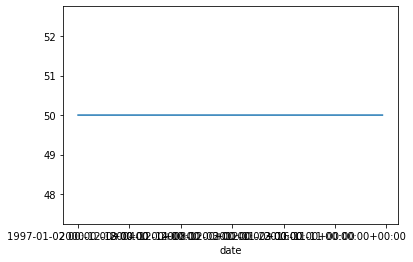

In [101]:
comb.groupby(['date'])['ticker'].nunique().plot()

In [104]:
comb.sort_values(by=['date','ticker'])

,date,ticker
11,1997-01-02 00:00:00+00:00,AES
33,1997-01-02 00:00:00+00:00,ALXN
7,1997-01-02 00:00:00+00:00,AMAT
4,1997-01-02 00:00:00+00:00,AMD
49,1997-01-02 00:00:00+00:00,AOS
...,...,...
296278,2020-07-20 00:00:00+00:00,VFC
296297,2020-07-20 00:00:00+00:00,VTR
296261,2020-07-20 00:00:00+00:00,WHR
296270,2020-07-20 00:00:00+00:00,WOR


In [111]:
oldies.shape[0]

296300

In [108]:
comb.drop_duplicates()

,date,ticker
0,1997-01-02 00:00:00+00:00,YHOO
27,1997-01-02 00:00:00+00:00,FDO
28,1997-01-02 00:00:00+00:00,CCE
29,1997-01-02 00:00:00+00:00,WMB
30,1997-01-02 00:00:00+00:00,SPLS
...,...,...
296269,2020-07-20 00:00:00+00:00,SLM
296270,2020-07-20 00:00:00+00:00,WOR
296271,2020-07-20 00:00:00+00:00,THC
296261,2020-07-20 00:00:00+00:00,WHR
